Problem Statement: -

The head of HR of a certain organization wants to automate their salary hike estimation. The organization consulted an analytics service provider and asked them to build a basic prediction model by providing them with a dataset that contains the data about the number of years of experience and the salary hike given accordingly. Build a Simple Linear Regression model with salary as the target variable. Apply necessary transformations and record the RMSE and correlation coefficient values for different models..

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# Data Understanding 

In [2]:
df=pd.read_csv("4Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
df.shape

(30, 2)

In [7]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [8]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [9]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [12]:
df.duplicated(['Salary']).sum()

0

In [13]:
df.duplicated().sum()

0

In [14]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0>

In [15]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# Outliers Treatment

<Axes: >

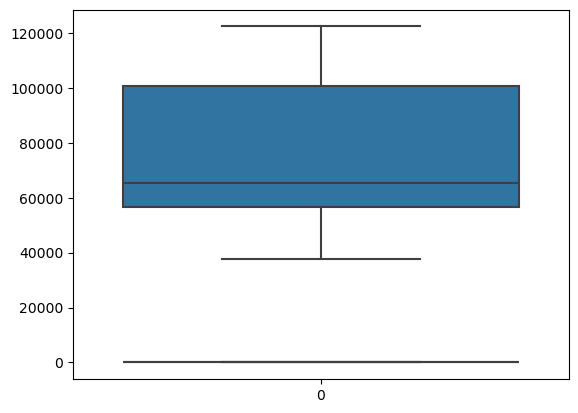

In [16]:
sns.boxplot(df['YearsExperience'])
sns.boxplot(df['Salary'])

<Axes: >

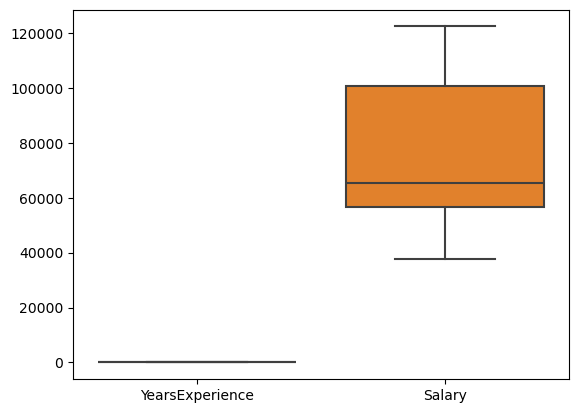

In [17]:
sns.boxplot(df)

#there are no outliers present here

4.Exploratory Data Analysis (EDA):
       4.1 Summary.
       4.2 Univariate analysis.
       4.3 Bivariate analysis.

# Univariate Analysis

C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


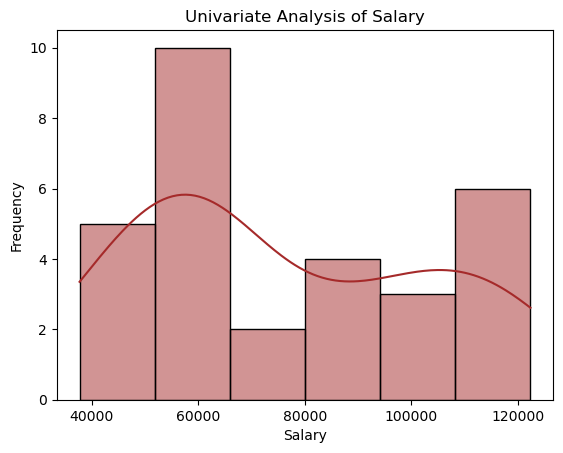

C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


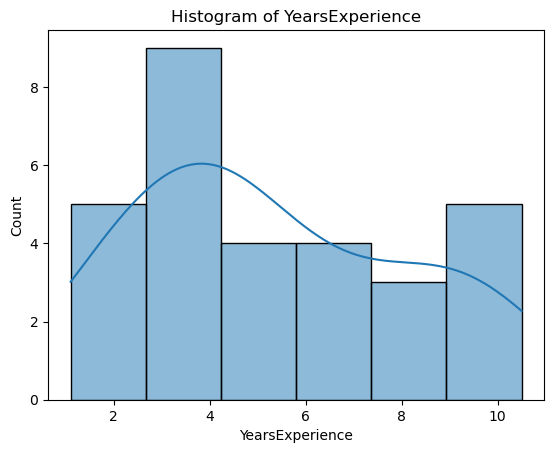

In [24]:
sns.histplot(df['Salary'], kde=True, color='brown')
plt.title('Univariate Analysis of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

sns.histplot(df['YearsExperience'],kde=True)
plt.title('Histogram of YearsExperience')
plt.show()

C:\Users\Vaishnavi\AppData\Local\Temp\ipykernel_14780\2614900338.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salary'],kde=True)
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Salary', ylabel='Density'>

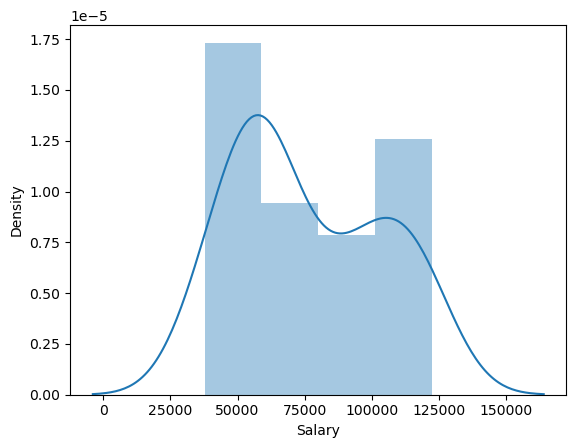

In [25]:
sns.distplot(df['Salary'],kde=True)

C:\Users\Vaishnavi\AppData\Local\Temp\ipykernel_14780\188635791.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['YearsExperience'],kde=True)
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='YearsExperience', ylabel='Density'>

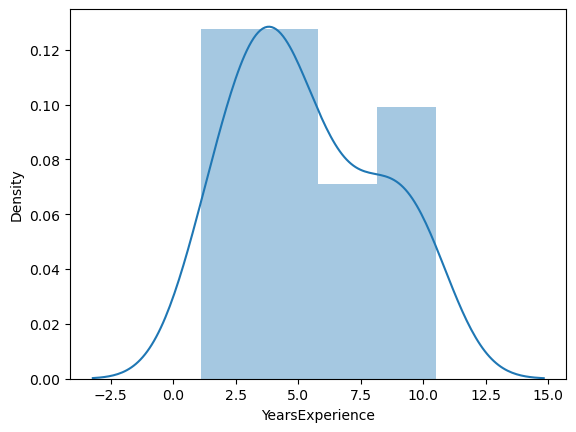

In [26]:
sns.distplot(df['YearsExperience'],kde=True)

# Bivariate Analysis

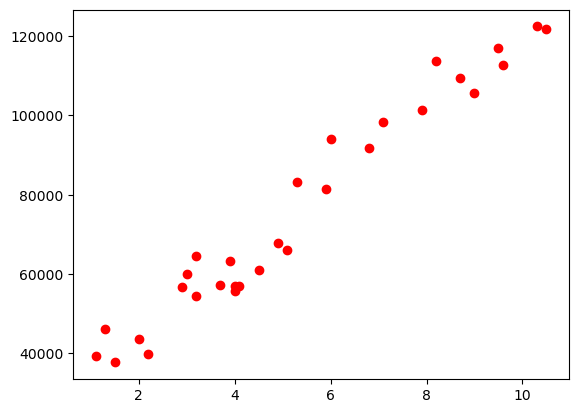

In [27]:
plt.scatter(x=df['YearsExperience'],y=df['Salary'],color='red')

#here data is linear.as the values are if one increases the other increases.It is in positive direction

In [28]:
df['YearsExperience'].cov(df['Salary'])

76106.30344827585

In [29]:
df.corr() #this tells that the features are strongly but positively correlated to each other

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [30]:
df.kurtosis()

YearsExperience   -1.012212
Salary            -1.295421
dtype: float64

In [31]:
df.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

<Axes: >

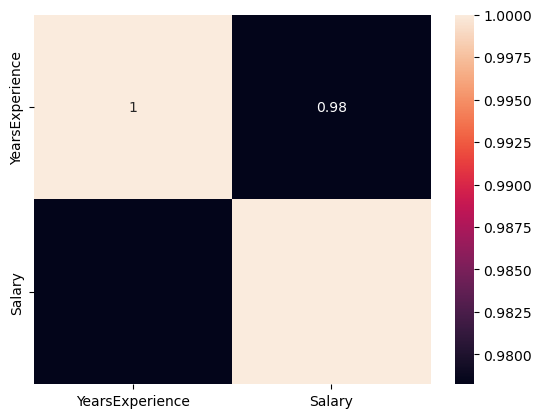

In [32]:
sns.heatmap(df.corr(),annot=True)

In [33]:
import statsmodels.formula.api as smf
df['x']=df['YearsExperience']
df['y']=df['Salary']


In [34]:
model=smf.ols('y~x',data=df).fit()

In [36]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           1.14e-20
Time:                        22:28:49   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.0

In [37]:
pred1=model.predict(df['x'])

C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

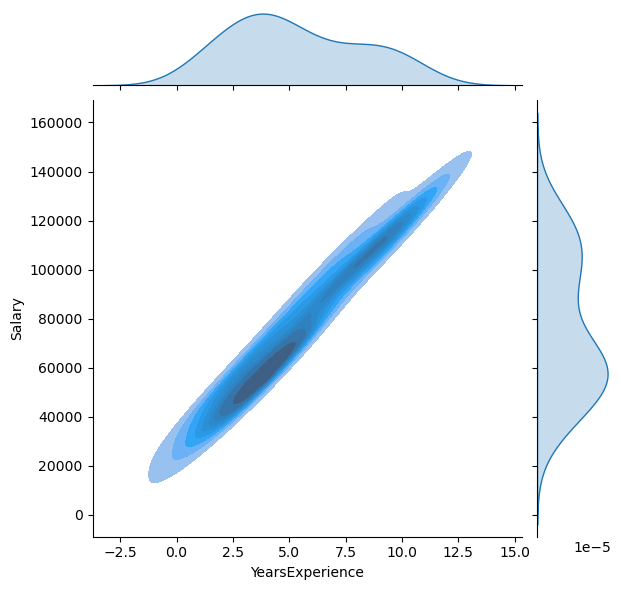

In [39]:
sns.jointplot(df,x='YearsExperience',y='Salary',kind='kde',fill=True)

C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='x', ylabel='Density'>

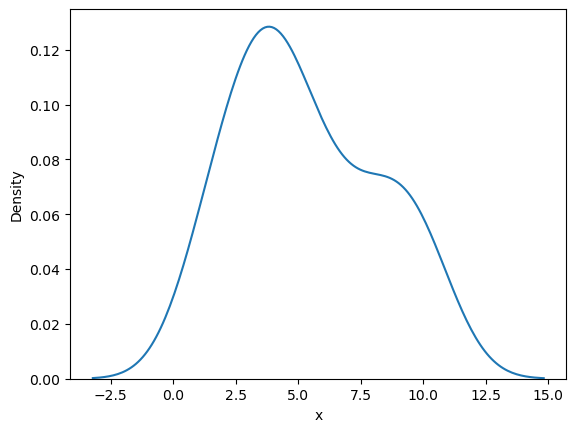

In [40]:
sns.kdeplot(df['x'])

In [41]:

from sklearn.metrics import r2_score 
r2_score(df['y'],pred1)

0.9569566641435086

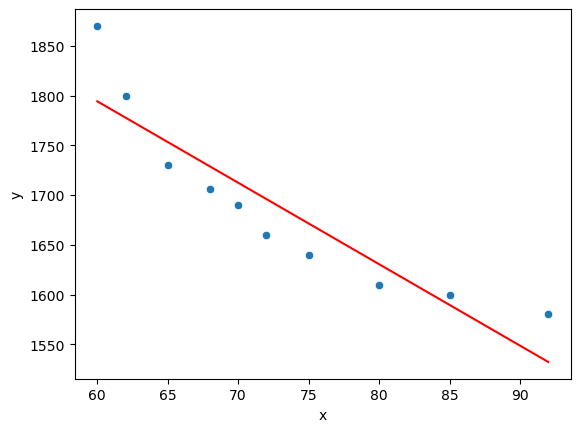

In [48]:
sns.scatterplot(df,x='x',y='y')
plt.plot(df['x'],pred1,color='red')

In [49]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(df[['x']],df[['y']])

LinearRegression()

In [50]:
y_pred=lr.predict(df[['x']])
r2_score(df.y,y_pred)

0.8312363099883755